# Описание располагаемых данных

|Признак|Описание|
|------:|:-------|
|`id` | идентификатор объекта|
|`object_name` | название объекта общественного питания|
|`address` | адрес|

Инструкция:

Шаг 1.  Изучите материалы лекционных и практических занятий по теме 5.1-5.3.

Шаг 2. Создайте аналитическую программу, которая считывает текст из файла (Алгоритм выполнения представлен в практическом занятии (мастер-классе) по теме 5.3).

Шаг 3. Реализуйте алгоритм предварительной обработки данных, который подсчитывает количество вхождений слов (Алгоритм выполнения представлен в практическом занятии (мастер-классе) по теме 5.3). Посчитайте количество вхождений для следующего набора слов
```python
'улица', 'переулок', 'шоссе', 'площадь', 'бульвар', 'проезд', 'тупик', 'просек', 'проспект', 'набережная', 'аллея', 'квартал', 'линия'
```

Шаг 4. Используя библиотеку matplotlib, визуализируйте полученные результаты (Алгоритм выполнения представлен в практическом занятии (мастер-классе) по теме 5.3). 

Шаг 5. Опубликуйте ссылку на файл расширения ipynb, прикрепив его в этом задании.

In [1]:
#Подключение библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#Чтение исходных данных
df = pd.read_csv('dataset_address.csv')
df.head(2)

,id,object_name,address
0,151635,СМЕТАНА,"город Москва, улица Егора Абакумова, дом 9"
1,77874,Родник,"город Москва, улица Талалихина, дом 2/1, корпус 1"


In [3]:
# исходный массив типов улиц
type_street = ['улица', 'переулок', 'шоссе', 'площадь', 'бульвар', 'проезд', 'тупик', 'просек', 'проспект', 'набережная', 'аллея', 'квартал', 'линия']

In [4]:
# функция для поиска типа улицы  
def split_street(s): # на вход строка с адресом -- далее это будет каждая ячейка из столбца `address`  
    find_street = '' # вспомогательная переменная, в которой будет храниться найденный тип улицы
    for street in type_street: # перебираем каждый тип улицы из списка
        if s.lower().find(street) !=-1: # если тип улицы найден
            find_street = street # то запоминаем его
            break # прерываем цикл
        else: 
            find_street = 'no_street' # в противном случае перечисленных типов улицы не обнаружено 
    return find_street # возвращаем тип улицы

In [5]:
df['street'] = df['address'].apply(split_street) #применение функции к столбцу с адресом  

In [9]:
#группировка
result = df[df.street != 'no_street'].groupby('street').\
                             agg(count_type_street = ('street','count')).\
                             reset_index().\
                             sort_values(by = 'count_type_street', 
                                         ascending = False)

In [10]:
result

,street,count_type_street
11,улица,9088
9,проспект,1444
12,шоссе,1325
7,проезд,794
1,бульвар,754
5,переулок,725
4,набережная,390
6,площадь,385
0,аллея,44
10,тупик,15


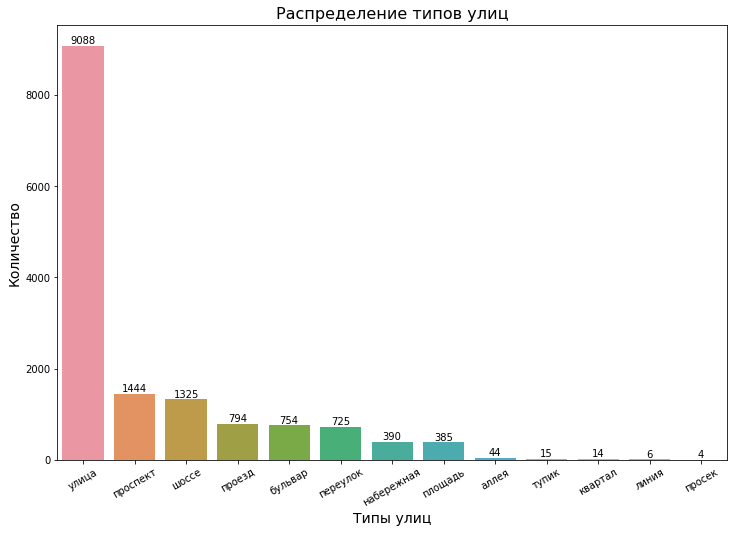

In [8]:
fig = plt.figure(figsize = (12,8))
ax = plt.axes()
ax = sns.barplot(x = 'street', 
                  y = 'count_type_street',  
                  data = result)
ax.set_title('Распределение типов улиц', fontsize = 16); 
ax.set_xlabel('Типы улиц', fontsize = 14);
ax.set_ylabel('Количество', fontsize = 14);
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30);
for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{}'.format(int(p.get_height())), 
            (x.mean(), y),ha='center', va='bottom', fontsize = 10)

